In [24]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import scipy.interpolate

# ASTR 310 Homework 11

### 1. Collisional ionization equilibrium

The setup for this problem is long, but the problem itself is not complex. Read it all the way through before you try to solve it.

At very low densities and high temperatures, gas can exist in a state called collisional ionization equilibrium, in which collisions between atoms and electrons are energetic enough to produce ionization, but recombination of ions and electrons produces photons that escape from the gas without interacting further. For a pure hydrogen gas, the situation looks like this (assuming the initial free electron is "borrowed" from another ionization):

$$ \mathrm{H} + e^- \rightarrow p^+ + e^- + e^- \rightarrow \mathrm{H} + e^- + \gamma. $$


The photons ($\gamma$) gradually carry away energy from the gas, but the rate of energy loss is much slower than the rate at which the ratio of ionized ($p^+$) to neutral (H) hydrogen achieves a steady value.

$ \newcommand{\nh}{{n_\mathrm{H}}\,} $
$ \newcommand{\nhe}{{n_\mathrm{He}}\,} $
$ \newcommand{\xhp}{{x_\mathrm{H+}}\,} $
$ \newcommand{\xhep}{{x_\mathrm{He+}}\,} $
$ \newcommand{\xhepp}{{x_\mathrm{He++}}\,} $
$ \renewcommand{\ne}{{n_e}\,} $
$ \newcommand{\ch}{{C_\mathrm{H}}\,} $
$ \newcommand{\che}{{C_\mathrm{He}}\,} $
$ \newcommand{\chep}{{C_\mathrm{He+}}\,} $
$ \newcommand{\rhp}{{R_\mathrm{H+}}\,} $
$ \newcommand{\rhep}{{R_\mathrm{He+}}\,} $
$ \newcommand{\rhepp}{{R_\mathrm{He++}}\,} $

Suppose we have a hydrogen plus helium gas at density $\rho$ and temperature $T$ with a hydrogen mass fraction $X$.  The number density of hydrogen atoms, whether ionized or neutral, is $\nh \approx \rho X/m_p$, and that of helium is
$\nhe \approx \rho(1-X)/(4 m_p).$  Let $\xhp$ represent the fraction of hydrogen atoms that are ionized, and let $\xhep$ and $\xhepp$ represent the fractions of helium atoms that are singly or doubly ionized, respectively. Balancing the rates of collisional ionizations with the rates of radiative recombinations yields the equations
\begin{align*}
\nh(1-\xhp) \ne \ch &= \nh \xhp \ne \rhp \\
 \nhe(1-\xhep-\xhepp) \ne \che &= \nhe \xhep \ne \rhep \\
 \nhe \xhep \ne \chep &= \nhe \xhepp \ne \rhepp 
\end{align*}

where $\ne$ is the number density of free electrons, $C_i$ is the temperature-dependent collisional ionization rate coefficient for species $i$, and $R_i$ is the temperature-dependent radiative recombination rate coefficient for species $i$. (For aficionados: we neglect charge exchange and double ionization processes.) The electron number density is given by charge neutrality as

$$ \ne = \nh + 2\nhe,$$
 
but we will not need it here, since it divides out. (Check this for yourself.)

Rearranging and eliminating common factors, these equations become the following.
\begin{align*}
 (\ch + \rhp)\, \xhp &= \ch \\
 (\che + \rhep)\, \xhep + \che \xhepp &= \che \\
 \chep \xhep - \rhepp \xhepp &= 0. \\
\end{align*}
These make a linear system whose solution is the vector $[\xhp, \xhep, \xhepp]$. Notice that the coefficients multiplying $\xhep$  and $\xhepp$ in the first equation are zero, and the coefficients multiplying $\xhp$ in the second and third equations are also zero. So the equations can be written in matrix form as

$$
\begin{bmatrix}
\ch + \rhp & 0 & 0 \\
0 & \che + \rhep & \che \\
0 & \chep & -\rhepp
\end{bmatrix}
\begin{bmatrix}
\xhp \\
\xhep \\
\,\xhepp\,
\end{bmatrix}
=
\begin{bmatrix}
\ch \\
\che \\
0
\end{bmatrix}.
$$ 

The rate coefficients are given as functions of temperature approximately by
$ \newcommand{\tf}{{T_4}} $
$ \newcommand{\cms}{{~\mathrm{cm^3~s^{-1}}}} $


\begin{align*}
\ch (\tf) &\approx 5.8\times 10^{-9}\; \tf^{1/2} e^{-15.78/\tf} \cms \\
\rhp(\tf) &\approx 4.13\times 10^{-13}\; \tf^{-0.7131-0.115 \ln \tf} \cms \\
\che(\tf) &\approx 2.8\times 10^{-9}\; \tf^{1/2} e^{-28.54/\tf} \cms \\
\rhep(\tf) &\approx 1.54\times 10^{-13}\; \tf^{-0.486} + 2.72\times 10^{-13}\; \tf^{-0.789} \cms \\
\chep(\tf) &\approx 4.3\times 10^{-10}\; \tf^{1/2} e^{-63.13/\tf} \cms \\
\rhepp(\tf) &\approx 1.65\times 10^{-12}\; \biggr(\frac{\tf}{4}\biggr)^{-0.7131-0.115 \ln(\tf/4)} \cms \\
\end{align*}


where $\tf \equiv T/(10^4 \mathrm{K}).$  So the ionization fractions $\xhp$, $\xhep$, and $\xhepp$  are functions of temperature: given a temperature, we compute the $C$ and $R$ coefficients, then substitute for them in the matrix equation above and solve the corresponding linear system to find the ionization fractions at that temperature.

**a)** Write a function that, given the temperature in K, returns the equilibrium coefficient matrix and the right-hand side column vector in the matrix equation, in cgs units. Evaluate and print the coefficient matrix for $T_4 = 10.$

[14 pts]

In [25]:
def create_matrix(T4):
    C_H = 5.8e-9 * (T4**0.5) * np.exp(-15.78/T4)
    R_H_plus = 4.13e-13 * (T4**(-0.7131 - 0.115*np.log(T4)))
    C_He = 2.8e-9 * (T4**0.5) * np.exp(-28.54/T4)
    R_He_plus = 1.54e-13 * (T4**-0.486) + 2.72e-13 * T4**-0.789
    C_He_plus = 4.3e-10 * (T4**0.5) * np.exp(-63.13/T4)
    R_He_plus_plus = 1.65e-12 * (T4/4)**(-0.7131-0.115*np.log(T4/4))

    A = np.array([
        [C_H+R_H_plus, 0, 0],
        [0, C_He+R_He_plus, C_He],
        [0, C_He_plus, -R_He_plus_plus]
    ])

    b = np.array([
        C_H, 
        C_He, 
        0
    ])

    return A, b

create_matrix(10)

(array([[ 3.78543930e-09,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.10225350e-10,  5.10130840e-10],
        [ 0.00000000e+00,  2.46471888e-12, -7.79436283e-13]]),
 array([3.78539585e-09, 5.10130840e-10, 0.00000000e+00]))

**b)** Construct a 1D array containing 100 logarithmically spaced temperatures between 3000 K and $3\times 10^5$ K. For each temperature value, use your function from part (a) to set up the matrix equation and solve it to obtain the three ionization fractions at that temperature. Store the three ionization fractions corresponding to each temperature in three other 1D arrays.

[14 pts]

In [26]:
x = 3*np.logspace(3, 5, 100, base=10)

x_H_plus = []
x_He_plus = []
x_He_plus_plus = []

for T in x:
    A, b = create_matrix(T/1e4)
    X = linalg.solve(A, b)
    x_H_plus.append(X[0])
    x_He_plus.append(X[1])
    x_He_plus_plus.append(X[2])

x_H_plus = np.array(x_H_plus)
x_He_plus = np.array(x_He_plus)
x_He_plus_plus = np.array(x_He_plus_plus)

**c)** Interpolate to find at what temperatures the ionization fractions of those three species are equal to 50\%.  Possible pitfall: note that the abundance of singly ionized helium is not monotonic with temperature.

[10 pts]

In [40]:
# find x for y=0.5
interp = scipy.interpolate.interp1d(x_H_plus, x, kind='linear')
x_H_plus_half = interp(0.5)

interp = scipy.interpolate.interp1d(x_He_plus[0:50], x[0:50], kind='linear')
x_He_plus_half = interp(0.5)

interp = scipy.interpolate.interp1d(x_He_plus_plus, x, kind='linear')
x_He_plus_plus_half = interp(0.5)

**d)** Plot the ionization fractions as functions of temperature on a single log-linear plot using curves of different colors. Include a proper legend and axis labels, and mark the interpolated 50% points with `plt.axvline`. 

[12 pts]

Text(0, 0.5, 'Ionization Fraction')

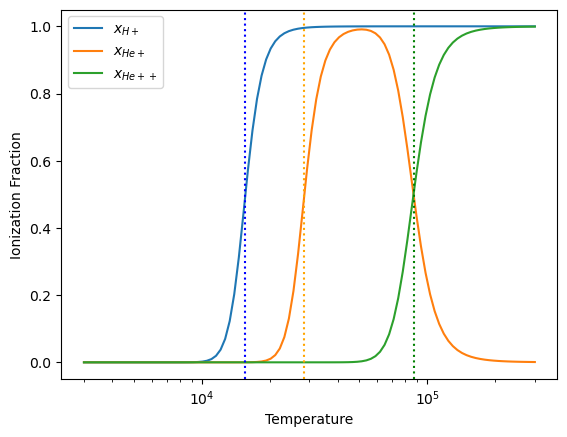

In [44]:
plt.plot(x, x_H_plus, label="$x_{H+}$")
plt.plot(x, x_He_plus, label="$x_{He+}$")
plt.plot(x, x_He_plus_plus, label="$x_{He++}$")

plt.axvline(x_H_plus_half, c='blue', ls='dotted')
plt.axvline(x_He_plus_half, c='orange', ls='dotted')
plt.axvline(x_He_plus_plus_half, c='green', ls='dotted')

plt.xscale('log')
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Ionization Fraction")